In [49]:
from control import ss, tf, step_response, input_output_response
from matplotlib.pyplot import plot, xlabel, ylabel, title, legend, grid
from numpy import zeros, ones, linspace, array
from scipy.integrate import solve_ivp

from sympy import symbols, expand, simplify, exp, factor, latex
from sympy.abc import s, t, lamda, theta
from sympy.matrices import Matrix, eye

# Problem 18.3

$A_1\frac{dh_1}{dt}=F_{in,1}-\frac{h_1}{R_1}$

$A_2\frac{dh_2}{dt}=F_{in,2}+\frac{h_1}{R_1}-\frac{h_2}{R_2}$

$F_{in,1}=k_{c,1}\left(h_{1,sp}-h_1\right)$

$F_{in,2}=k_{c,2}\left(h_{2,sp}-h_2\right)$

$A_1\frac{dh_1}{dt}=k_{c,1}\left(h_{1,sp}-h_1\right)-\frac{h_1}{R_1}$

$A_2\frac{dh_2}{dt}=k_{c,2}\left(h_{2,sp}-h_2\right)+\frac{h_1}{R_1}-\frac{h_2}{R_2}$

State space description:

$A_1\frac{dh_1}{dt}=-\left(k_{c,1}+R_1^{-1}\right)h_1+k_{c,1}h_{1,sp}$

$A_2\frac{dh_2}{dt}=R_1^{-1}h_1-\left(k_{c,2}+R_2^{-1}\right)h_2+k_{c,2}h_{2,sp}$

Taking Laplace Transforms

$H_1=\frac{k_{c,1}}{A_1s+k_{c,1}+R_1^{-1}}H_{1,sp}$

$H_2=\frac{k_{c,2}}{A_2s+k_{c,2}+R_2^{-1}}H_{2,sp}+\frac{R_1^{-1}H_1}{A_2s+k_{c,2}+R_2^{-1}}$

$H_2=\frac{k_{c,2}}{A_2s+k_{c,2}+R_2^{-1}}H_{2,sp}+\frac{R_1^{-1}k_{c,1}}{\left(A_2s+k_{c,2}+R_2^{-1}\right)\left(A_1s+k_{c,1}+R_1^{-1}\right)}H_{1,sp}$

Transfer function description:

$H_1=\frac{k_{c,1}}{A_1s+k_{c,1}+R_1^{-1}}H_{1,sp}$

$H_2=\frac{k_{c,2}R_2}{A_2R_2s+R_2k_{c,2}+1}H_{2,sp}+\frac{R_2k_{c,1}}{\left(A_2R_2s+R_2k_{c,2}+1\right)\left(A_1R_1s+R_1k_{c,1}+1\right)}H_{1,sp}$

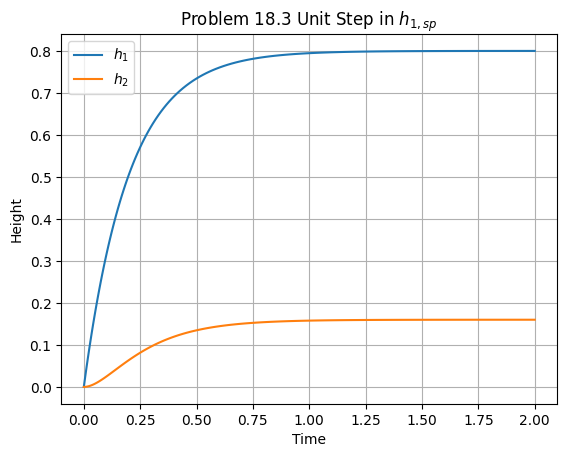

In [50]:
def p1_ode(t, y, h_1sp, h_2sp):
    f = y * 0
    h_1 = y[0]
    h_2 = y[1]

    A_1 = 1
    A_2 = 0.5
    R_1 = 1
    R_2 = 2
    k_c1 = 4
    k_c2 = 4.5

    f[0] = (k_c1 * (h_1sp - h_1) - h_1 / R_1) / A_1
    f[1] = (k_c2 * (h_2sp - h_2) + h_1 / R_1 - h_2 / R_2) / A_2

    return f

ode_args = (p1_ode, [0, 2], [0, 0])

ode_kwargs = {
    'method': "Radau",
    'atol': 1e-8,
    'rtol': 1e-8,
}

p1_sol_1 = solve_ivp(*ode_args, **ode_kwargs, args=(1, 0))

plot(p1_sol_1.t, p1_sol_1.y[0], label=r"$h_1$")
plot(p1_sol_1.t, p1_sol_1.y[1], label=r"$h_2$")
grid()
xlabel("Time")
ylabel("Height")
title(r"Problem 18.3 Unit Step in $h_{1,sp}$")
legend()

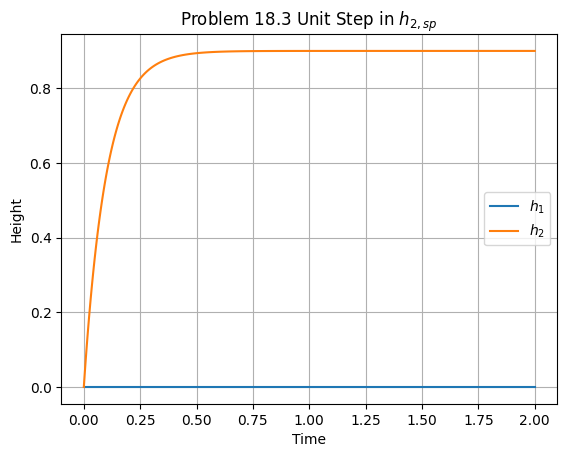

In [51]:
p1_sol_2 = solve_ivp(*ode_args, **ode_kwargs, args=(0, 1))

plot(p1_sol_2.t, p1_sol_2.y[0], label=r"$h_1$")
plot(p1_sol_2.t, p1_sol_2.y[1], label=r"$h_2$")
grid()
xlabel("Time")
ylabel("Height")
title(r"Problem 18.3 Unit Step in $h_{2,sp}$")
legend()

The set point of $h_1$ affects $h_2$ because tank 2 is downstream of tank 1. The set point of $h_2$ does not affect $h_1$ because the set point of $h_2$ does not affect the inlet flow rate.

# Problem 19.1

## Part A

$G_p^-=\frac{k\left(s\tau_{0}+1\right)}{\left(s\tau_{1}+1\right)\left(s\tau_{2}+1\right)\left(s\tau_{3}+1\right)}$

$G_p^-=1$

$r=2$

In [52]:
k, tau_0, tau_1, tau_2, tau_3 = symbols("k, tau_0, tau_1, tau_2, tau_3")

Gpp = 1
Gpm = k * (1 + tau_0 * s) / (1 + tau_1 * s) / (1 + tau_2 * s) / (1 + tau_3 * s)
r = 2

G_c = factor(simplify(1 / ((lamda * s + 1)**r - Gpp) / Gpm))

G_c

(s*tau_1 + 1)*(s*tau_2 + 1)*(s*tau_3 + 1)/(k*lamda*s*(lamda*s + 2)*(s*tau_0 + 1))

$G_c=\frac{\left(s\tau_{1}+1\right)\left(s\tau_{2}+1\right)\left(s\tau_{3}+1\right)}{k\lambda s\left(\lambda s+2\right)\left(s\tau_{0}+1\right)}$

Not a PID. There are three zeros and three poles.

## Part B

$G_p^-=\frac{k\left(s\tau_{0}+1\right)}{\left(s\tau_{1}+1\right)\left(s\tau_{2}+1\right)\left(s\tau_{3}+1\right)}$

$G_p^-=\frac{-s\tau_{0}+1}{s\tau_{0}+1}$

$r=2$

In [53]:
Gpp = (1 - tau_0 * s) / (1 + tau_0 * s)

G_c = factor(simplify(1 / ((lamda * s + 1)**r - Gpp) / Gpm))

G_c

(s*tau_1 + 1)*(s*tau_2 + 1)*(s*tau_3 + 1)/(k*s*(lamda**2*s**2*tau_0 + lamda**2*s + 2*lamda*s*tau_0 + 2*lamda + 2*tau_0))

$G_c=\frac{\left(s\tau_{1}+1\right)\left(s\tau_{2}+1\right)\left(s\tau_{3}+1\right)}{ks\left(\lambda^{2}s^{2}\tau_{0}+\lambda^{2}s+2\lambda s\tau_{0}+2\lambda+2\tau_{0}\right)}$

Not a PID. There are three zeros.

## Part C

$G_p^-=\frac{k}{\left(s\tau_{1}+1\right)\left(s\tau_{2}+1\right)}$

$G_p^-=e^{-s\theta}$

$r=2$

In [54]:
Gpp = exp(-theta * s)
Gpm = k / (1 + tau_1 * s) / (1 + tau_2 * s)
r = 2
G_c = factor(simplify(1 / ((lamda * s + 1)**r - Gpp) / Gpm))

G_c

(s*tau_1 + 1)*(s*tau_2 + 1)*exp(s*theta)/(k*(lamda**2*s**2*exp(s*theta) + 2*lamda*s*exp(s*theta) + exp(s*theta) - 1))

$G_c=\frac{\left(s\tau_{1}+1\right)\left(s\tau_{2}+1\right)e^{s\theta}}{k\left(\lambda^{2}s^{2}e^{s\theta}+2\lambda se^{s\theta}+e^{s\theta}-1\right)}$

Not a PID. There is an exponential.

### Pade

$G_p^-=\frac{k}{\left(s\tau_{1}+1\right)\left(s\tau_{2}+1\right)}$

$G_p^-=\frac{-\frac{s\theta}{2}+1}{\frac{s\theta}{2}+1}$

$r=2$

In [55]:
pade_1 = (1 - theta * s / 2) / (1 + theta * s / 2)
Gpp = pade_1
Gpm = k / (1 + tau_1 * s) / (1 + tau_2 * s)
r = 2
G_c = factor(simplify(1 / ((lamda * s + 1)**r - Gpp) / Gpm))

G_c

(s*tau_1 + 1)*(s*tau_2 + 1)*(s*theta + 2)/(k*s*(lamda**2*s**2*theta + 2*lamda**2*s + 2*lamda*s*theta + 4*lamda + 2*theta))

$G_c=-\frac{\left(s\tau_{1}+1\right)\left(s\tau_{2}+1\right)\left(s\theta+2\right)^{2}}{ks\left(s\theta-2\right)\left(\lambda^{2}s^{2}\theta+2\lambda^{2}s+2\lambda s\theta+4\lambda+2\theta\right)}$

Not a PID. There are three zeros.